
## Catchments  ## 

**Pour points**

Definition: Specific locations on the river network where we want to measure or model water flow.
Examples: Gauging stations, river mouths, dams, hydropower plants.

**Catchments**
 
Definition: The area of land where all rainfall drains to the same pour point.
Each catchment is linked to exactly one pour point.



## 1. Crop and Save a Smaller DEM, ACC, DIR (TIF) for Bhutan + Buffer
Instead of processing the full Asia-wide TIF files, we first crop and save a smaller GeoTIFF files limited to the Bhutan region and its buffer (latitude 25.0°–29.5°, longitude 87.0°–93.5°). 

**DEM** — Digital Elevation Model

- A raster grid of ground elevation (usually meters above sea level).

**DIR** — Flow Direction

- A raster showing which neighboring cell water flows to from each cell (downslope).
- In HydroSHEDS (ESRI D8), values encode directions: 1=E, 2=SE, 4=S, 8=SW, 16=W, 32=NW, 64=N, 128=NE. 
- Computed from the DEM.

**ACC** — Flow Accumulation

- For each cell, how much upstream area drains into it.
- High ACC = river channels; used to define streams and to snap pour points.

In [21]:
#First lets cut DEM
import rasterio
from rasterio.windows import from_bounds
from rasterio.enums import Resampling
import os
import gc

# Define the input and output paths
input_tif = "../../data/HydroSHEDS/as_dem_3s.tif"
output_tif = "../../data/HydroSHEDS/as_dem_Bhutan_and_buffer.tif"

# Define the bounding box for Bhutan + buffer (in degrees)
min_lon, max_lon = 87.0, 93.5
min_lat, max_lat = 25.0, 29.5

# Open the source TIFF file
with rasterio.open(input_tif) as src:
    print(f"📦 Number of bands in TIFF: {src.count}")
    if src.count != 1:
        raise ValueError("❌ Expected only one band in the DEM file.")

    # Compute the pixel window corresponding to the bounding box
    window = from_bounds(min_lon, min_lat, max_lon, max_lat, transform=src.transform)

    # Read the data within that window (band 1 = elevation)
    data = src.read(1, window=window)

    # Get the updated transform for the cropped window
    transform = src.window_transform(window)

    # Save the cropped raster to a new TIF
    out_meta = src.meta.copy()
    out_meta.update({
        "height": window.height,
        "width": window.width,
        "transform": transform
    })

    with rasterio.open(output_tif, "w", **out_meta) as out_src:
        out_src.write(data, 1)

print(f"✅ Saved: {output_tif}")
print(f"📐 Size (width x height): {window.width} x {window.height}")

# Check file size in MB
file_size_mb = os.path.getsize(output_tif) / (1024 * 1024)
print(f"💾 File size: {file_size_mb:.2f} MB")

with rasterio.open(output_tif) as tif_check:
    print(f"📌 CRS: {tif_check.crs}")
    print(f"🧭 Bounds: {tif_check.bounds}")
    print(f"📦 Data type: {tif_check.dtypes[0]}")
    print(f"🧮 NoData value: {tif_check.nodata}")

# 🔥 Clean up memory
del data, transform, out_meta, window, tif_check, src, out_src
gc.collect()
print("✅ Memory cleaned up.")

📦 Number of bands in TIFF: 1
✅ Saved: ../../data/HydroSHEDS/as_dem_Bhutan_and_buffer.tif
📐 Size (width x height): 7800.0 x 5400.0
💾 File size: 80.37 MB
📌 CRS: EPSG:4326
🧭 Bounds: BoundingBox(left=87.0, bottom=25.000000000000007, right=93.5, top=29.500000000000007)
📦 Data type: int16
🧮 NoData value: 32767.0
✅ Memory cleaned up.


In [22]:
#Cut DIR and ACC
import rasterio
from rasterio.windows import from_bounds
from rasterio.enums import Resampling
import os
import gc

# === ACC ===
input_tif_acc  = "../../data/HydroSHEDS/as_acc_3s.tif"
output_tif_acc = "../../data/HydroSHEDS/as_acc_Bhutan_and_buffer.tif"

# Bhutan + buffer (degrees)
min_lon, max_lon = 87.0, 93.5
min_lat, max_lat = 25.0, 29.5

with rasterio.open(input_tif_acc) as src_acc:
    print(f"📦 Number of bands in TIFF: {src_acc.count}")
    if src_acc.count != 1:
        raise ValueError("❌ Expected only one band in the ACC file.")

    window_acc = from_bounds(min_lon, min_lat, max_lon, max_lat, transform=src_acc.transform)

    data_acc = src_acc.read(1, window=window_acc)
    transform_acc = src_acc.window_transform(window_acc)

    out_meta_acc = src_acc.meta.copy()
    out_meta_acc.update({
        "height": window_acc.height,
        "width": window_acc.width,
        "transform": transform_acc
    })

    with rasterio.open(output_tif_acc, "w", **out_meta_acc) as out_src_acc:
        out_src_acc.write(data_acc, 1)

print(f"✅ Saved: {output_tif_acc}")
print(f"📐 Size (width x height): {window_acc.width} x {window_acc.height}")

file_size_mb_acc = os.path.getsize(output_tif_acc) / (1024 * 1024)
print(f"💾 File size: {file_size_mb_acc:.2f} MB")

with rasterio.open(output_tif_acc) as tif_check_acc:
    print(f"📌 CRS: {tif_check_acc.crs}")
    print(f"🧭 Bounds: {tif_check_acc.bounds}")
    print(f"📦 Data type: {tif_check_acc.dtypes[0]}")
    print(f"🧮 NoData value: {tif_check_acc.nodata}")

# 🔥 Clean up memory (ACC)
del data_acc, transform_acc, out_meta_acc, window_acc, tif_check_acc, src_acc, out_src_acc
gc.collect()
print("✅ Memory cleaned up (ACC).")


# === DIR ===
input_tif_dir  = "../../data/HydroSHEDS/as_dir_3s.tif"
output_tif_dir = "../../data/HydroSHEDS/as_dir_Bhutan_and_buffer.tif"

with rasterio.open(input_tif_dir) as src_dir:
    print(f"📦 Number of bands in TIFF: {src_dir.count}")
    if src_dir.count != 1:
        raise ValueError("❌ Expected only one band in the DIR file.")

    window_dir = from_bounds(min_lon, min_lat, max_lon, max_lat, transform=src_dir.transform)

    data_dir = src_dir.read(1, window=window_dir)
    transform_dir = src_dir.window_transform(window_dir)

    out_meta_dir = src_dir.meta.copy()
    out_meta_dir.update({
        "height": window_dir.height,
        "width": window_dir.width,
        "transform": transform_dir
    })

    with rasterio.open(output_tif_dir, "w", **out_meta_dir) as out_src_dir:
        out_src_dir.write(data_dir, 1)

print(f"✅ Saved: {output_tif_dir}")
print(f"📐 Size (width x height): {window_dir.width} x {window_dir.height}")

file_size_mb_dir = os.path.getsize(output_tif_dir) / (1024 * 1024)
print(f"💾 File size: {file_size_mb_dir:.2f} MB")

with rasterio.open(output_tif_dir) as tif_check_dir:
    print(f"📌 CRS: {tif_check_dir.crs}")
    print(f"🧭 Bounds: {tif_check_dir.bounds}")
    print(f"📦 Data type: {tif_check_dir.dtypes[0]}")
    print(f"🧮 NoData value: {tif_check_dir.nodata}")

# 🔥 Clean up memory (DIR)
del data_dir, transform_dir, out_meta_dir, window_dir, tif_check_dir, src_dir, out_src_dir
gc.collect()
print("✅ Memory cleaned up (DIR).")

📦 Number of bands in TIFF: 1
✅ Saved: ../../data/HydroSHEDS/as_acc_Bhutan_and_buffer.tif
📐 Size (width x height): 7800.0 x 5400.0
💾 File size: 160.71 MB
📌 CRS: EPSG:4326
🧭 Bounds: BoundingBox(left=87.0, bottom=25.000000000000007, right=93.5, top=29.500000000000007)
📦 Data type: uint32
🧮 NoData value: 4294967295.0
✅ Memory cleaned up (ACC).
📦 Number of bands in TIFF: 1
✅ Saved: ../../data/HydroSHEDS/as_dir_Bhutan_and_buffer.tif
📐 Size (width x height): 7800.0 x 5400.0
💾 File size: 40.20 MB
📌 CRS: EPSG:4326
🧭 Bounds: BoundingBox(left=87.0, bottom=25.000000000000007, right=93.5, top=29.500000000000007)
📦 Data type: uint8
🧮 NoData value: 255.0
✅ Memory cleaned up (DIR).


Let's have a quick look at DIR. Let's format as_dir_Bhutan_and_buffer.tif to csv and see some statistic

In [23]:
# dir_to_csv_and_stats_bt.py
# Reads ESRI-D8 flow-direction raster and writes CSV + short stats.

from pathlib import Path
import csv
import numpy as np
import rasterio

# --- Paths ---
# Point this to your bt_out folder; the DIR is one level above it.
bt_out = Path("../../data/HydroSHEDS/bt_out").resolve()     # <-- adjust if needed
dir_tif = (bt_out.parent / "as_dir_Bhutan_and_buffer.tif").resolve()

csv_out = bt_out / "as_dir_Bhutan_and_buffer.csv"
summary_csv = bt_out / "as_dir_Bhutan_and_buffer_summary.csv"

print("CWD:", Path.cwd())
print("bt_out:", bt_out)
print("DIR path:", dir_tif)

assert dir_tif.exists(), f"Not found: {dir_tif}"
bt_out.mkdir(parents=True, exist_ok=True)

WRITE_COORDS = True  # write x,y (lon/lat if EPSG:4326; otherwise raster units)

# ESRI-D8 valid codes and human-friendly names
VALID_CODES = np.array([1, 2, 4, 8, 16, 32, 64, 128], dtype=np.int32)
CODE2NAME = {1:"E", 2:"SE", 4:"S", 8:"SW", 16:"W", 32:"NW", 64:"N", 128:"NE"}

with rasterio.open(dir_tif) as src, open(csv_out, "w", newline="") as fcsv:
    width, height = src.width, src.height
    transform = src.transform
    nodata = src.nodata
    crs = src.crs

    writer = csv.writer(fcsv)
    header = ["row", "col", "dir_code", "dir_name"]
    if WRITE_COORDS:
        header = ["row", "col", "x", "y", "dir_code", "dir_name"]
    writer.writerow(header)

    # Accumulators for stats
    counts = {int(k): 0 for k in VALID_CODES}
    nodata_count = 0
    other_count = 0
    total = width * height

    # Iterate over internal blocks (memory-friendly)
    for _, window in src.block_windows(1):
        arr = src.read(1, window=window)
        r0, c0 = window.row_off, window.col_off

        # Masks
        valid_mask = np.isin(arr, VALID_CODES)
        if nodata is not None:
            nodata_mask = (arr == nodata)
            valid_mask &= ~nodata_mask
            nodata_count += int(nodata_mask.sum())
        else:
            nodata_mask = np.zeros_like(arr, dtype=bool)

        # "Other" = not valid D8 and not NoData
        other_mask = ~(valid_mask | nodata_mask)
        other_count += int(other_mask.sum())

        # Update per-code counts
        for code in VALID_CODES:
            counts[int(code)] += int((arr == code).sum())

        # Write CSV rows for valid pixels
        if valid_mask.any():
            rr, cc = np.where(valid_mask)
            codes = arr[rr, cc].astype(np.int32)

            # Absolute indices
            rr_abs = rr + r0
            cc_abs = cc + c0

            if WRITE_COORDS:
                from rasterio.transform import xy
                xs, ys = xy(transform, rr_abs, cc_abs, offset="center")
                for r, c, x, y, code in zip(rr_abs, cc_abs, xs, ys, codes):
                    writer.writerow([int(r), int(c), float(x), float(y), int(code), CODE2NAME.get(int(code), "NA")])
            else:
                for r, c, code in zip(rr_abs, cc_abs, codes):
                    writer.writerow([int(r), int(c), int(code), CODE2NAME.get(int(code), "NA")])

# --- Print short stats ---
print("=== DIR raster summary ===")
print(f"Path: {dir_tif}")
print(f"Size: {width} x {height}  (pixels: {total:,})")
print(f"CRS:  {crs}")
print(f"NoData: {nodata}")
valid_total = sum(counts.values())
print(f"Valid D8 pixels: {valid_total:,} | NoData: {nodata_count:,} | Other: {other_count:,}")
for code in sorted(counts):
    cnt = counts[code]
    pct = (cnt / total * 100.0) if total else 0.0
    print(f"  code {code:>3} ({CODE2NAME[code]:>2}): {cnt:,}  ({pct:.2f}%)")

# Write summary CSV
with open(summary_csv, "w", newline="") as fs:
    w = csv.writer(fs)
    w.writerow(["dir_code", "dir_name", "count", "percent_of_total"])
    for code in sorted(counts):
        cnt = counts[code]
        pct = (cnt / total * 100.0) if total else 0.0
        w.writerow([code, CODE2NAME[code], cnt, f"{pct:.6f}"])
    w.writerow(["NoData", "NoData", nodata_count, f"{(nodata_count/total*100.0) if total else 0.0:.6f}"])
    w.writerow(["Other", "Non-ESRI-D8", other_count, f"{(other_count/total*100.0) if total else 0.0:.6f}"])

print(f"\nCSV written to:     {csv_out}")
print(f"Summary written to: {summary_csv}")

CWD: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/code/HydroSHEDS
bt_out: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out
DIR path: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/as_dir_Bhutan_and_buffer.tif


=== DIR raster summary ===
Path: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/as_dir_Bhutan_and_buffer.tif
Size: 7800 x 5400  (pixels: 42,120,000)
CRS:  EPSG:4326
NoData: 255.0
Valid D8 pixels: 42,119,998 | NoData: 0 | Other: 2
  code   1 ( E): 5,393,447  (12.80%)
  code   2 (SE): 4,542,543  (10.78%)
  code   4 ( S): 7,342,118  (17.43%)
  code   8 (SW): 4,623,546  (10.98%)
  code  16 ( W): 6,242,265  (14.82%)
  code  32 (NW): 4,045,610  (9.60%)
  code  64 ( N): 5,971,809  (14.18%)
  code 128 (NE): 3,958,660  (9.40%)

CSV written to:     /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/as_dir_Bhutan_and_buffer.csv
Summary written to: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/as_dir_Bhutan_and_buffer_summary.csv


In [24]:
# dir_csv_summary_min.py
from pathlib import Path
from collections import Counter
import pandas as pd
import numpy as np

csv_path = Path("../../data/HydroSHEDS/bt_out/as_dir_Bhutan_and_buffer.csv").resolve()
assert csv_path.exists(), f"Not found: {csv_path}"
print("Using CSV:", csv_path)

# 1) Columns + quick peek
header = pd.read_csv(csv_path, nrows=0)
cols = list(header.columns)
print("\nColumns:", cols)
print("\nHead (first 5 rows):")
print(pd.read_csv(csv_path, nrows=5))

# 2) Chunked basic stats
usecols = [c for c in ["row","col","x","y","dir_code","dir_name"] if c in cols]
dtypes  = {"row": np.int32, "col": np.int32, "x": np.float64, "y": np.float64,
           "dir_code": np.int16, "dir_name": "string"}
dtypes  = {k:v for k,v in dtypes.items() if k in usecols}

chunksize = 1_000_000
total = 0
nulls = Counter()
hist_code = Counter()
hist_name = Counter()
min_x, max_x = float("inf"), -float("inf")
min_y, max_y = float("inf"), -float("inf")

for chunk in pd.read_csv(csv_path, usecols=usecols, dtype=dtypes, chunksize=chunksize):
    n = len(chunk); total += n
    nulls.update(chunk.isna().sum().to_dict())
    if "dir_code" in chunk: hist_code.update(chunk["dir_code"].value_counts().to_dict())
    if "dir_name" in chunk: hist_name.update(chunk["dir_name"].value_counts().to_dict())
    if "x" in chunk:
        min_x = min(min_x, float(chunk["x"].min())); max_x = max(max_x, float(chunk["x"].max()))
    if "y" in chunk:
        min_y = min(min_y, float(chunk["y"].min())); max_y = max(max_y, float(chunk["y"].max()))

print("\n=== BASIC SUMMARY ===")
print(f"Rows total: {total:,}")
if {"x","y"}.issubset(usecols):
    print(f"BBOX (lon/lat): xmin={min_x:.6f}, ymin={min_y:.6f}, xmax={max_x:.6f}, ymax={max_y:.6f}")

print("\nNulls per column:")
for c in usecols:
    print(f"  {c}: {nulls.get(c, 0):,}")

if hist_code:
    print("\nDirection histogram (dir_code):")
    for code in sorted(hist_code):
        cnt = hist_code[code]; pct = (cnt/total*100) if total else 0
        print(f"  {int(code):>3}: {cnt:,} ({pct:.2f}%)")

if hist_name:
    print("\nDirection histogram (dir_name):")
    for name, cnt in hist_name.most_common():
        pct = (cnt/total*100) if total else 0
        print(f"  {name:>2}: {cnt:,} ({pct:.2f}%)")

Using CSV: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/as_dir_Bhutan_and_buffer.csv

Columns: ['row', 'col', 'x', 'y', 'dir_code', 'dir_name']

Head (first 5 rows):
   row  col          x          y  dir_code dir_name
0    0    0  87.000417  29.499583         2       SE
1    0    1  87.001250  29.499583         2       SE
2    0    2  87.002083  29.499583         2       SE
3    0    3  87.002917  29.499583         2       SE
4    0    4  87.003750  29.499583         2       SE

=== BASIC SUMMARY ===
Rows total: 42,119,998
BBOX (lon/lat): xmin=87.000417, ymin=25.000417, xmax=93.499583, ymax=29.499583

Nulls per column:
  row: 0
  col: 0
  x: 0
  y: 0
  dir_code: 0
  dir_name: 0

Direction histogram (dir_code):
    1: 5,393,447 (12.80%)
    2: 4,542,543 (10.78%)
    4: 7,342,118 (17.43%)
    8: 4,623,546 (10.98%)
   16: 6,242,265 (14.82%)
   32: 4,045,610 (9.60%)
   64: 5,971,809 (14.18%)
  128: 3,958,660 (9.40%)

Direction h

| Column     | Type    | Origin               | Meaning                                  | How obtained / notes |
|------------|---------|----------------------|-------------------------------------------|----------------------|
| row        | integer | Added (derived)      | Raster row index (top→down: 0…H−1).       | From pixel array index; not stored in GeoTIFF. |
| col        | integer | Added (derived)      | Raster column index (left→right: 0…W−1).  | From pixel array index; not stored in GeoTIFF. |
| x          | float   | Added (derived)      | Longitude (center of pixel) in EPSG:4326.* | Computed via affine transform (rasterio.transform.xy). |
| y          | float   | Added (derived)      | Latitude (center of pixel) in EPSG:4326.*  | Computed via affine transform (rasterio.transform.xy). |
| dir_code   | integer | Native (GeoTIFF)     | ESRI-D8 flow direction code ∈ {1,2,4,8,16,32,64,128}. | Direct pixel value from DIR raster. |
| dir_name   | string  | Added (derived)      | Human-readable direction (E, SE, S, SW, W, NW, N, NE). | Mapped from dir_code via lookup table. |

*Since the raster CRS is EPSG:4326, x = longitude and y = latitude. In a projected CRS (e.g., UTM), x/y would be meters (Easting/Northing).

## 2. Generate catchments (basins) from DIR + ACC
Note: ESRI-D8 flow direction: a raster layer of flow directions using ESRI’s D8 scheme. Each pixel stores a code for the direction water flows to:
1 = E, 2 = SE, 4 = S, 8 = SW, 16 = W, 32 = NW, 64 = N, 128 = NE.

 ##  Pour Points Strategy


* 1 Extract streams from ACC (threshold = 30,000 cells)
WhiteboxTools ExtractStreams thresholds the flow‐accumulation raster to a binary stream mask streams.tif.
(At 3″ ≈ 90 m pixels, 1 cell ≈ 0.0081 km² → 30,000 cells ≈ 243 km².)

* 2 Find internal confluence pour-point candidates
On the Bhutan+buffer grid, for each stream cell, inspect its 8 neighbors and count how many upstream stream neighbors flow into it per ESRI-D8. If inflow ≥ 2, mark the cell as a raw pour-point candidate (internal confluence).

* 3 Filter candidates by minimum contributing area
Keep only candidates with ACC ≥ 120,000 cells (≈ 972 km²) to remove small/ephemeral junctions.

* 4 Merge nearby candidates (Chebyshev ≤ 4 px) and pick a representative
Collapse candidates within 4 pixels (≈ 360 m in any direction). For each merged group, keep the point with maximum ACC (deterministic tie-break by row/col).

* 5 Rasterize pour points
Write pp_internal_confluences.tif on the same grid; each pour point gets a unique integer ID (1..K).

* 6 Delineate watersheds (DIR + pour_pts)
WhiteboxTools Watershed uses the ESRI-D8 pointer (as_dir_Bhutan_and_buffer.tif) and the pour-point raster to assign each pixel to its basin → watersheds_internal.tif.

Inputs:
DIR = ESRI-D8 flow-direction raster (as_dir_Bhutan_and_buffer.tif), where each cell points to exactly one downslope neighbor.
pour_pts = raster of pour points (pp_internal_confluences.tif) where each pour point has a unique ID (1..K), other cells are 0.

Algorithm (WhiteboxTools → Watershed with esri_pntr=True):
For every cell in the grid, follow its D8 pointer downstream until you either:
hit a pour-point cell → then this cell belongs to that pour point’s basin, so the pour-point ID is assigned to it; or
leave the grid / hit NoData / then it’s not assigned (written as 0/NoData).

Output:
watersheds_internal.tif — a labeled raster where each pixel’s value is the ID of the pour point it drains to (i.e., basin label). Pixels that don’t drain to any pour point are 0/NoData.

Notes:
We use the D8 pointer (not the DEM) at this stage; drainage topology is already encoded.
esri_pntr=True tells the tool our D8 codes are ESRI-style (1,2,4,8,16,32,64,128).

* 7 Polygonize and save vectors
Convert the labeled raster to polygons (RasterToVectorPolygons), then write a GeoPackage via pyogrio.
Outputs: watersheds_internal.shp, watersheds_internal.gpkg (layer watersheds).

* 8 Per-basin stats
Reproject to EPSG:8857 (equal-area) and compute area_km2. If a Bhutan boundary is available, intersect to get area_inside_km2, compute inside_fraction, and assign class ∈ {inside, edge, outside}. Write watersheds_internal_summary.csv.

* 9 Quick visualization
Plot colored basins and overlay the Bhutan outline (if available) → watersheds_internal_quicklook.png.

Last run produced (for reference only)

Raw internal confluences: 7,883,837
After ACC ≥ 120,000: 1,188
After merge (≤ 4 px): 851 pour points → ~851 watersheds

How to reduce the number of basins: raise MIN_CONFLUENCE_ACC and/or STREAM_THRESHOLD_CELLS.

In [25]:
# Purpose: Catchments for Bhutan + buffer using INTERNAL confluences (not raster-frame outlets)
# Steps: Streams(ACC) → internal confluence pour points → ACC filter → proximity merge → watershed(DIR) → clip → polygons → stats → quick plot
# Notes: Confluence detection is vectorized; merging uses KD-tree (Chebyshev, p=∞) when SciPy is available.

import sys, subprocess
from pathlib import Path
import numpy as np
import rasterio
import pyogrio
import whitebox

# ---------- Utilities ----------
def ensure_package(name):
    try:
        __import__(name)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", name])

# Py3.8 fix for whitebox (importlib.resources.files)
if sys.version_info < (3, 9):
    ensure_package("importlib_resources")
    import importlib.resources as ir
    import importlib_resources
    if not hasattr(ir, "files"):
        ir.files = importlib_resources.files

# Try SciPy for KD-tree (fast merge); fall back to O(N^2) if unavailable
try:
    from scipy.spatial import cKDTree
    HAVE_SCIPY = True
except Exception:
    HAVE_SCIPY = False
    print("⚠️ SciPy not available; merging will use a slower O(N^2) fallback.")

# ---------- Params (tuned) ----------
STREAM_THRESHOLD_CELLS = 30_000    # ACC ≥ this → stream raster
MIN_CONFLUENCE_ACC     = 120_000   # keep only significant internal confluences
INFLOW_MIN             = 2         # ≥ number of upstream stream neighbors (ESRI-D8) to mark a confluence
MERGE_RADIUS_PX        = 4         # Chebyshev radius for merging pour points
EQUAL_AREA_EPSG        = 8857      # equal-area CRS for area computation (fallback to 3857 if needed)

# ---------- Paths ----------
root     = Path("../../data/HydroSHEDS").resolve()
dir_tif  = root / "as_dir_Bhutan_and_buffer.tif"   # ESRI-D8 directions
acc_tif  = root / "as_acc_Bhutan_and_buffer.tif"   # flow accumulation (cells)
out_dir  = root / "bt_out"; out_dir.mkdir(parents=True, exist_ok=True)

# Optional boundary for inside/edge stats & plotting (set to None if not available)
bhutan_vec   = root / "bhutan_boundary.gpkg"
bhutan_layer = "bhutan"

streams_tif  = out_dir / "streams.tif"
pp_rast      = out_dir / "pp_internal_confluences.tif"
ws_tif       = out_dir / "watersheds_internal.tif"
ws_shp       = out_dir / "watersheds_internal.shp"
ws_gpkg      = out_dir / "watersheds_internal.gpkg"
ws_csv       = out_dir / "watersheds_internal_summary.csv"
plot_png     = out_dir / "watersheds_internal_quicklook.png"

# ESRI-D8 → (dr, dc). Rows increase downward; cols to the right.
code2off = {1:(0,1), 2:(1,1), 4:(1,0), 8:(1,-1), 16:(0,-1), 32:(-1,-1), 64:(-1,0), 128:(-1,1)}
# Inverse: offset from neighbor → code that flows *into* center
off2code = {(-dr, -dc): code for code, (dr, dc) in code2off.items()}

# ---------- Whitebox ----------
wbt = whitebox.WhiteboxTools()
wbt.work_dir = str(out_dir)

# ---------- Alignment checks ----------
assert dir_tif.exists() and acc_tif.exists(), "Missing DIR/ACC inputs"
with rasterio.open(dir_tif) as rD, rasterio.open(acc_tif) as rA:
    assert rD.crs == rA.crs, "CRS mismatch"
    assert rD.transform == rA.transform, "Transform mismatch"
    assert (rD.width, rD.height) == (rA.width, rA.height), "Size mismatch"
    H, W = rD.height, rD.width
    profile = rD.profile
    base_crs = rD.crs
    base_transform = rD.transform
print(f"Aligned grids: {W}x{H} | CRS={profile['crs']}")
print(f"Params → STREAM_THRESHOLD={STREAM_THRESHOLD_CELLS}, MIN_CONFLUENCE_ACC={MIN_CONFLUENCE_ACC}, INFLOW_MIN={INFLOW_MIN}, MERGE_RADIUS_PX={MERGE_RADIUS_PX}")

# ---------- 1) Streams from ACC ----------
ok = wbt.extract_streams(flow_accum=str(acc_tif), output=str(streams_tif), threshold=STREAM_THRESHOLD_CELLS)
print("Streams:", ok, "→", streams_tif)

# ---------- Read base rasters ----------
with rasterio.open(dir_tif) as rD:
    DIR = rD.read(1); dir_nd = rD.nodata
with rasterio.open(acc_tif) as rA:
    ACC = rA.read(1); acc_nd = rA.nodata
with rasterio.open(streams_tif) as rS:
    STR = rS.read(1).astype(bool)

# ---------- Territory mask (Bhutan + buffer extent) ----------
mask_territory = np.ones_like(DIR, dtype=bool)
if dir_nd is not None:
    mask_territory &= (DIR != dir_nd)

# ---------- 2) INTERNAL confluence candidates (vectorized) ----------
# Base: stream cells within the working grid; count upstream stream neighbors via ESRI-D8.
STR_main = STR & mask_territory
inflow = np.zeros_like(STR_main, dtype=np.uint8)
offsets = [(0,1),(1,1),(1,0),(1,-1),(0,-1),(-1,-1),(-1,0),(-1,1)]
for dr, dc in offsets:
    # roll neighbor arrays so that neighbors align to the center
    sh_str = np.roll(STR_main, shift=(-dr, -dc), axis=(0, 1))
    sh_dir = np.roll(DIR,       shift=(-dr, -dc), axis=(0, 1))
    # mask out wrap-around edges introduced by roll
    edge = np.ones_like(STR_main, dtype=bool)
    if dr > 0: edge[:dr,  :] = False
    if dr < 0: edge[dr:,  :] = False
    if dc > 0: edge[:, :dc] = False
    if dc < 0: edge[:, dc:] = False
    # neighbor flows into center if its DIR equals code for (-dr, -dc)
    needed_code = off2code[(-dr, -dc)]
    inflow += (edge & sh_str & (sh_dir == needed_code)).astype(np.uint8)

cand_mask = STR_main & (inflow >= INFLOW_MIN)
rr, cc = np.where(cand_mask)
candidates = list(zip(rr.tolist(), cc.tolist()))
print("Internal confluence candidates (raw):", len(candidates))

# ---------- 3) ACC filter (vectorized) ----------
valid_acc = np.ones_like(ACC, dtype=bool)
if acc_nd is not None:
    valid_acc &= (ACC != acc_nd)
flt_mask = cand_mask & valid_acc & (ACC >= MIN_CONFLUENCE_ACC)
rr, cc = np.where(flt_mask)
filtered = list(zip(rr.tolist(), cc.tolist()))
print(f"After ACC ≥ {MIN_CONFLUENCE_ACC}: {len(filtered)}")

# ---------- 4) Proximity merge (Chebyshev ≤ MERGE_RADIUS_PX) with deterministic tie-break ----------
def acc_at(r, c):
    v = ACC[r, c]
    return -1 if (acc_nd is not None and v == acc_nd) else float(v)

selected = []
if filtered:
    pts = np.array(filtered, dtype=np.int32)

    class DSU:
        def __init__(self, n): self.p=list(range(n)); self.r=[0]*n
        def find(self, x):
            while self.p[x] != x:
                self.p[x] = self.p[self.p[x]]; x = self.p[x]
            return x
        def union(self, a, b):
            ra, rb = self.find(a), self.find(b)
            if ra == rb: return
            if self.r[ra] < self.r[rb]: self.p[ra] = rb
            elif self.r[ra] > self.r[rb]: self.p[rb] = ra
            else: self.p[rb] = ra; self.r[ra] += 1

    N = len(pts)
    dsu = DSU(N)

    if HAVE_SCIPY:
        tree = cKDTree(pts.astype(float))
        for i, j in tree.query_pairs(r=MERGE_RADIUS_PX, p=np.inf):  # Chebyshev
            dsu.union(i, j)
    else:
        # bucketed O(N^2) in local windows
        tile = MERGE_RADIUS_PX + 1
        from collections import defaultdict
        buckets = defaultdict(list)
        for i, (r, c) in enumerate(pts):
            buckets[(r//tile, c//tile)].append(i)
        neigh_shifts = [(dr, dc) for dr in (-1,0,1) for dc in (-1,0,1)]
        for key, idxs in buckets.items():
            neigh_idxs = []
            for sh in neigh_shifts:
                neigh_idxs += buckets.get((key[0]+sh[0], key[1]+sh[1]), [])
            idxs = list(set(idxs + neigh_idxs))
            for a_i in range(len(idxs)):
                i = idxs[a_i]; r1, c1 = pts[i]
                for b_i in range(a_i+1, len(idxs)):
                    j = idxs[b_i]; r2, c2 = pts[j]
                    if max(abs(r1-r2), abs(c1-c2)) <= MERGE_RADIUS_PX:
                        dsu.union(i, j)

    groups = {}
    for i in range(N):
        root = dsu.find(i)
        groups.setdefault(root, []).append(i)

    for idxs in groups.values():
        # choose by (ACC, -row, -col) for deterministic tie-break
        best = max(
            idxs,
            key=lambda k: (acc_at(int(pts[k,0]), int(pts[k,1])), -int(pts[k,0]), -int(pts[k,1]))
        )
        r, c = int(pts[best, 0]), int(pts[best, 1])
        selected.append((r, c))

print(f"After proximity merge (≤ {MERGE_RADIUS_PX}px): {len(selected)} pour points")

# ---------- 5) Rasterize pour points (IDs 1..K) ----------
pp_arr = np.zeros((H, W), dtype=np.int32)
for i, (rr, cc) in enumerate(selected, start=1):
    pp_arr[rr, cc] = i

pp_profile = profile.copy()
pp_profile.update(dtype=rasterio.int32, count=1, compress="deflate", tiled=True, BIGTIFF="IF_SAFER")
with rasterio.open(pp_rast, "w", **pp_profile) as dst:
    dst.write(pp_arr, 1)
print("Pour points raster:", pp_rast)

# ---------- 6) Watershed delineation (DIR + pour_pts) ----------
ok = wbt.watershed(d8_pntr=str(dir_tif), pour_pts=str(pp_rast), output=str(ws_tif), esri_pntr=True)
print("Watersheds:", ok, "→", ws_tif)

# ---------- 7) Clip watersheds to Bhutan+buffer extent ----------
with rasterio.open(ws_tif) as rW:
    WZ = rW.read(1); wz_nd = rW.nodata
    ws_profile = rW.profile
if wz_nd is None: wz_nd = 0
WZ = np.where(mask_territory, WZ, wz_nd)
with rasterio.open(ws_tif, "w", **ws_profile) as dst:
    dst.write(WZ, 1)

# ---------- 8) Polygonize to SHP → write GPKG ----------
ok = wbt.raster_to_vector_polygons(i=str(ws_tif), output=str(ws_shp))
print("Polygons (SHP):", ok, "→", ws_shp)
gdf = pyogrio.read_dataframe(str(ws_shp))
with rasterio.open(ws_tif) as rW:
    if gdf.crs is None: gdf.set_crs(rW.crs, inplace=True)
pyogrio.write_dataframe(gdf, str(ws_gpkg), layer="watersheds", driver="GPKG", append=False)
print("GPKG:", ws_gpkg)

# ---------- 9) Stats per watershed (area, fraction inside Bhutan, class) ----------
import pandas as pd
try:
    gdf_aea = gdf.to_crs(EQUAL_AREA_EPSG)
    gdf["area_km2"] = (gdf_aea.geometry.area.values / 1_000_000.0)
except Exception as e:
    print("Equal-area reprojection failed; falling back to 3857:", e)
    gdf_aea = gdf.to_crs(3857)
    gdf["area_km2"] = (gdf_aea.geometry.area.values / 1_000_000.0)

if bhutan_vec and bhutan_vec.exists():
    try:
        import geopandas as gpd
        bh = pyogrio.read_dataframe(str(bhutan_vec), layer=bhutan_layer)
        if bh.crs is None: bh.set_crs(gdf.crs, inplace=True)
        elif bh.crs != gdf.crs: bh = bh.to_crs(gdf.crs)
        inter = gpd.overlay(gdf, bh, how="intersection", keep_geom_type=True)
        inter_aea = inter.to_crs(gdf_aea.crs)
        area_inside = inter_aea.geometry.area.groupby(inter.index_left).sum() / 1_000_000.0
        gdf["area_inside_km2"] = gdf.index.map(area_inside).fillna(0.0)
        gdf["inside_fraction"] = (gdf["area_inside_km2"] / gdf["area_km2"]).clip(0, 1)
        def classify(frac):
            if frac >= 0.999: return "inside"
            if frac <= 0.001: return "outside"
            return "edge"
        gdf["class"] = gdf["inside_fraction"].apply(classify)
    except Exception as e:
        print("Overlay stats failed:", e)
        gdf["area_inside_km2"] = np.nan
        gdf["inside_fraction"] = np.nan
        gdf["class"] = "unknown"
else:
    gdf["area_inside_km2"] = np.nan
    gdf["inside_fraction"] = np.nan
    gdf["class"] = "unknown"

# Write CSV summary (keep column names stable if Whitebox uses VALUE)
if "VALUE" in gdf.columns and "ws_id" not in gdf.columns:
    gdf = gdf.rename(columns={"VALUE":"ws_id"})
cols = [c for c in ["ws_id","id","VALUE","area_km2","area_inside_km2","inside_fraction","class"] if c in gdf.columns]
gdf[cols].to_csv(ws_csv, index=False)
print("Summary CSV:", ws_csv)

# ---------- 10) Quick visualization ----------
try:
    import geopandas as gpd
    import matplotlib.pyplot as plt
    ax = gdf.plot(column="ws_id" if "ws_id" in gdf.columns else None,
                  figsize=(10, 8), linewidth=0.3, edgecolor="black", legend=False)
    if bhutan_vec and bhutan_vec.exists():
        bh = pyogrio.read_dataframe(str(bhutan_vec), layer=bhutan_layer)
        if bh.crs is None: bh.set_crs(gdf.crs, inplace=True)
        elif bh.crs != gdf.crs: bh = bh.to_crs(gdf.crs)
        bh.boundary.plot(ax=ax, linewidth=1.0, edgecolor="black")
    ax.set_title("Watersheds (internal confluences) over Bhutan + buffer", fontsize=11)
    ax.set_axis_off()
    plt.tight_layout(); plt.savefig(plot_png, dpi=200); plt.close()
    print("Quicklook PNG:", plot_png)
except Exception as e:
    print("Plotting skipped:", e)

Aligned grids: 7800x5400 | CRS=EPSG:4326
Params → STREAM_THRESHOLD=30000, MIN_CONFLUENCE_ACC=120000, INFLOW_MIN=2, MERGE_RADIUS_PX=4
./whitebox_tools --run="ExtractStreams" --wd="/home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out" --flow_accum='/home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/as_acc_Bhutan_and_buffer.tif' --output='/home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/streams.tif' --threshold='30000' -v --compress_rasters=False

*****************************
* Welcome to ExtractStreams *
* Powered by WhiteboxTools  *
* www.whiteboxgeo.com       *
*****************************
Reading data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%

/home/merlin/.local/lib/python3.8/site-packages/pyogrio/raw.py:196: RuntimeWarning: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/watersheds_internal.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


GPKG: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/watersheds_internal.gpkg
Summary CSV: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/watersheds_internal_summary.csv
Quicklook PNG: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/watersheds_internal_quicklook.png


In [26]:
# Some checks here
from pathlib import Path
import numpy as np
import rasterio
import pyogrio
import geopandas as gpd

# --- Configure base directory (point this to your actual bt_out) ---
base = Path("/home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out")

rast_path = base / "watersheds_internal.tif"
gpkg_path = base / "watersheds_internal.gpkg"

# 1) Count unique watershed IDs in the raster (exclude NoData)
if rast_path.exists():
    with rasterio.open(rast_path) as r:
        Z = r.read(1)
        nd = r.nodata
    if nd is None:
        # If NoData is undefined, treat zeros as background (common for labeled rasters)
        n_ws = np.unique(Z[Z != 0]).size
    else:
        n_ws = np.unique(Z[Z != nd]).size
    print(f"Unique watersheds (raster): {n_ws}")
else:
    print(f"Raster not found: {rast_path}")

# 2) Count vector features in the GeoPackage (should be close to the raster count)
if gpkg_path.exists():
    gdf = pyogrio.read_dataframe(str(gpkg_path), layer="watersheds")
    print("Vector features:", len(gdf))
else:
    print(f"GeoPackage not found: {gpkg_path}")

# 3) Quick area statistics (if the 'area_km2' column exists)
if gpkg_path.exists():
    if "area_km2" in gdf.columns:
        print(gdf["area_km2"].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))
    else:
        print("Column 'area_km2' not found — run the stats step first.")

Unique watersheds (raster): 851
Vector features: 851
Column 'area_km2' not found — run the stats step first.


## 3. Visualization 

In [27]:
# === Visualization pack: basins map, Bhutan↔catchments mapping, and summary charts ===
# Requirements: pyogrio, geopandas, matplotlib (no seaborn), shapely>=2 (бажано)
from pathlib import Path
import matplotlib.pyplot as plt
import pyogrio
import geopandas as gpd
import pandas as pd

# ---- Inputs / outputs ----
root      = Path("../../data/HydroSHEDS").resolve()
out_dir   = root / "bt_out"
out_dir.mkdir(parents=True, exist_ok=True)

ws_gpkg   = out_dir / "watersheds_internal.gpkg"
ws_shp    = out_dir / "watersheds_internal.shp"
ws_layer  = "watersheds"
bh_gpkg   = root / "bhutan_boundary.gpkg"     # якщо нема — код пропустить мапінг
bh_layer  = "bhutan"

plots_dir = out_dir / "plots"
plots_dir.mkdir(exist_ok=True)

mapping_csv = out_dir / "bhutan_to_watersheds_mapping.csv"

# ---- Load watersheds (prefer GPKG, fallback to SHP) ----
if ws_gpkg.exists():
    ws = pyogrio.read_dataframe(str(ws_gpkg), layer=ws_layer)
else:
    ws = pyogrio.read_dataframe(str(ws_shp))

# Normalize ID column
if "VALUE" in ws.columns and "ws_id" not in ws.columns:
    ws = ws.rename(columns={"VALUE": "ws_id"})
if "ws_id" not in ws.columns:
    ws["ws_id"] = range(1, len(ws) + 1)

# Ensure valid CRS & geometries
if ws.crs is None:
    raise RuntimeError("Watersheds layer has no CRS; please set it before plotting.")
try:
    # fix invalid rings if any
    ws["geometry"] = ws.geometry.make_valid()
except Exception:
    ws["geometry"] = ws.buffer(0)

# Compute area_km2 if missing (equal-area reprojection)
if "area_km2" not in ws.columns:
    try:
        ws_aea = ws.to_crs(8857)  # World Cylindrical Equal Area
    except Exception:
        ws_aea = ws.to_crs(3857)  # fallback
    ws["area_km2"] = ws_aea.geometry.area / 1_000_000.0

# ─────────────────────────────────────────────────────────────────────────────
# (1) MAP: where the catchments are (full extent)
# ─────────────────────────────────────────────────────────────────────────────
ax = ws.plot(column="ws_id", figsize=(10, 8), linewidth=0.25, edgecolor="black", legend=False)
ax.set_title("Watersheds over Bhutan + buffer (full set)", fontsize=11)
ax.set_axis_off()
plt.tight_layout()
plt.savefig(plots_dir / "map_watersheds_full.png", dpi=200)
plt.close()

# ─────────────────────────────────────────────────────────────────────────────
# (2) Bhutan + buffer → catchments mapping (table + inside-only map)
#     If Bhutan boundary exists, intersect and summarize per ws_id.
# ─────────────────────────────────────────────────────────────────────────────
have_bhutan = bh_gpkg.exists()
if have_bhutan:
    bh = pyogrio.read_dataframe(str(bh_gpkg), layer=bh_layer)
    if bh.crs is None:
        bh = bh.set_crs(ws.crs)
    elif bh.crs != ws.crs:
        bh = bh.to_crs(ws.crs)

    # Intersect to get inside-Bhutan parts of each watershed
    inter = gpd.overlay(ws, bh, how="intersection", keep_geom_type=True)
    try:
        inter["geometry"] = inter.geometry.make_valid()
    except Exception:
        inter["geometry"] = inter.buffer(0)

    # Compute area_inside_km2 on equal-area CRS
    try:
        inter_aea = inter.to_crs(8857)
    except Exception:
        inter_aea = inter.to_crs(3857)
    inter["area_inside_km2"] = inter_aea.geometry.area / 1_000_000.0

    # Aggregate by watershed id
    by_ws = (
        inter[["ws_id", "area_inside_km2"]]
        .groupby("ws_id", as_index=False)
        .sum()
    )
    # Join back total area to get fractions
    mapping = ws[["ws_id", "area_km2"]].merge(by_ws, on="ws_id", how="left").fillna({"area_inside_km2": 0.0})
    mapping["inside_fraction"] = (mapping["area_inside_km2"] / mapping["area_km2"]).clip(0, 1)

    def _class(fr):
        if fr >= 0.999: return "inside"
        if fr <= 0.001: return "outside"
        return "edge"
    mapping["class"] = mapping["inside_fraction"].apply(_class)

    # Save mapping table
    mapping.sort_values("area_inside_km2", ascending=False).to_csv(mapping_csv, index=False)
    print(f"Mapping table written → {mapping_csv}")

    # Plot inside-only parts colored by ws_id
    ax = inter.plot(column="ws_id", figsize=(10, 8), linewidth=0.25, edgecolor="black", legend=False)
    # outline Bhutan for context
    bh.boundary.plot(ax=ax, linewidth=1.0)
    ax.set_title("Watersheds ∩ Bhutan (inside-only)", fontsize=11)
    ax.set_axis_off()
    plt.tight_layout()
    plt.savefig(plots_dir / "map_watersheds_inside_bhutan.png", dpi=200)
    plt.close()
else:
    print("Bhutan boundary not found — skipping inside/edge mapping and inside-only map.")
    mapping = None

# ─────────────────────────────────────────────────────────────────────────────
# (3) Extra charts
#   3a) Histogram of watershed areas (all basins)
#   3b) Top-20 watersheds by area *inside Bhutan* (if mapping is available) else by total area
# ─────────────────────────────────────────────────────────────────────────────
# 3a
plt.figure(figsize=(8, 5))
plt.hist(ws["area_km2"].values, bins=40)
plt.xlabel("Area, km²")
plt.ylabel("Count")
plt.title("Watershed area distribution (all basins)")
plt.tight_layout()
plt.savefig(plots_dir / "hist_watershed_areas.png", dpi=200)
plt.close()

# 3b
if mapping is not None:
    top = mapping.sort_values("area_inside_km2", ascending=False).head(20)
    values = top["area_inside_km2"].values
    labels = top["ws_id"].astype(str).tolist()
    title = "Top-20 watersheds by area inside Bhutan"
else:
    top = ws.sort_values("area_km2", ascending=False).head(20)
    values = top["area_km2"].values
    labels = top["ws_id"].astype(str).tolist()
    title = "Top-20 watersheds by total area"

plt.figure(figsize=(10, 6))
plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), labels, rotation=90)
plt.ylabel("Area, km²")
plt.title(title)
plt.tight_layout()
plt.savefig(plots_dir / "bar_top20_areas.png", dpi=200)
plt.close()

print("Saved figures:")
print(" -", plots_dir / "map_watersheds_full.png")
if have_bhutan:
    print(" -", plots_dir / "map_watersheds_inside_bhutan.png")
print(" -", plots_dir / "hist_watershed_areas.png")
print(" -", plots_dir / "bar_top20_areas.png")

Bhutan boundary not found — skipping inside/edge mapping and inside-only map.
Saved figures:
 - /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/plots/map_watersheds_full.png
 - /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/plots/hist_watershed_areas.png
 - /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/plots/bar_top20_areas.png


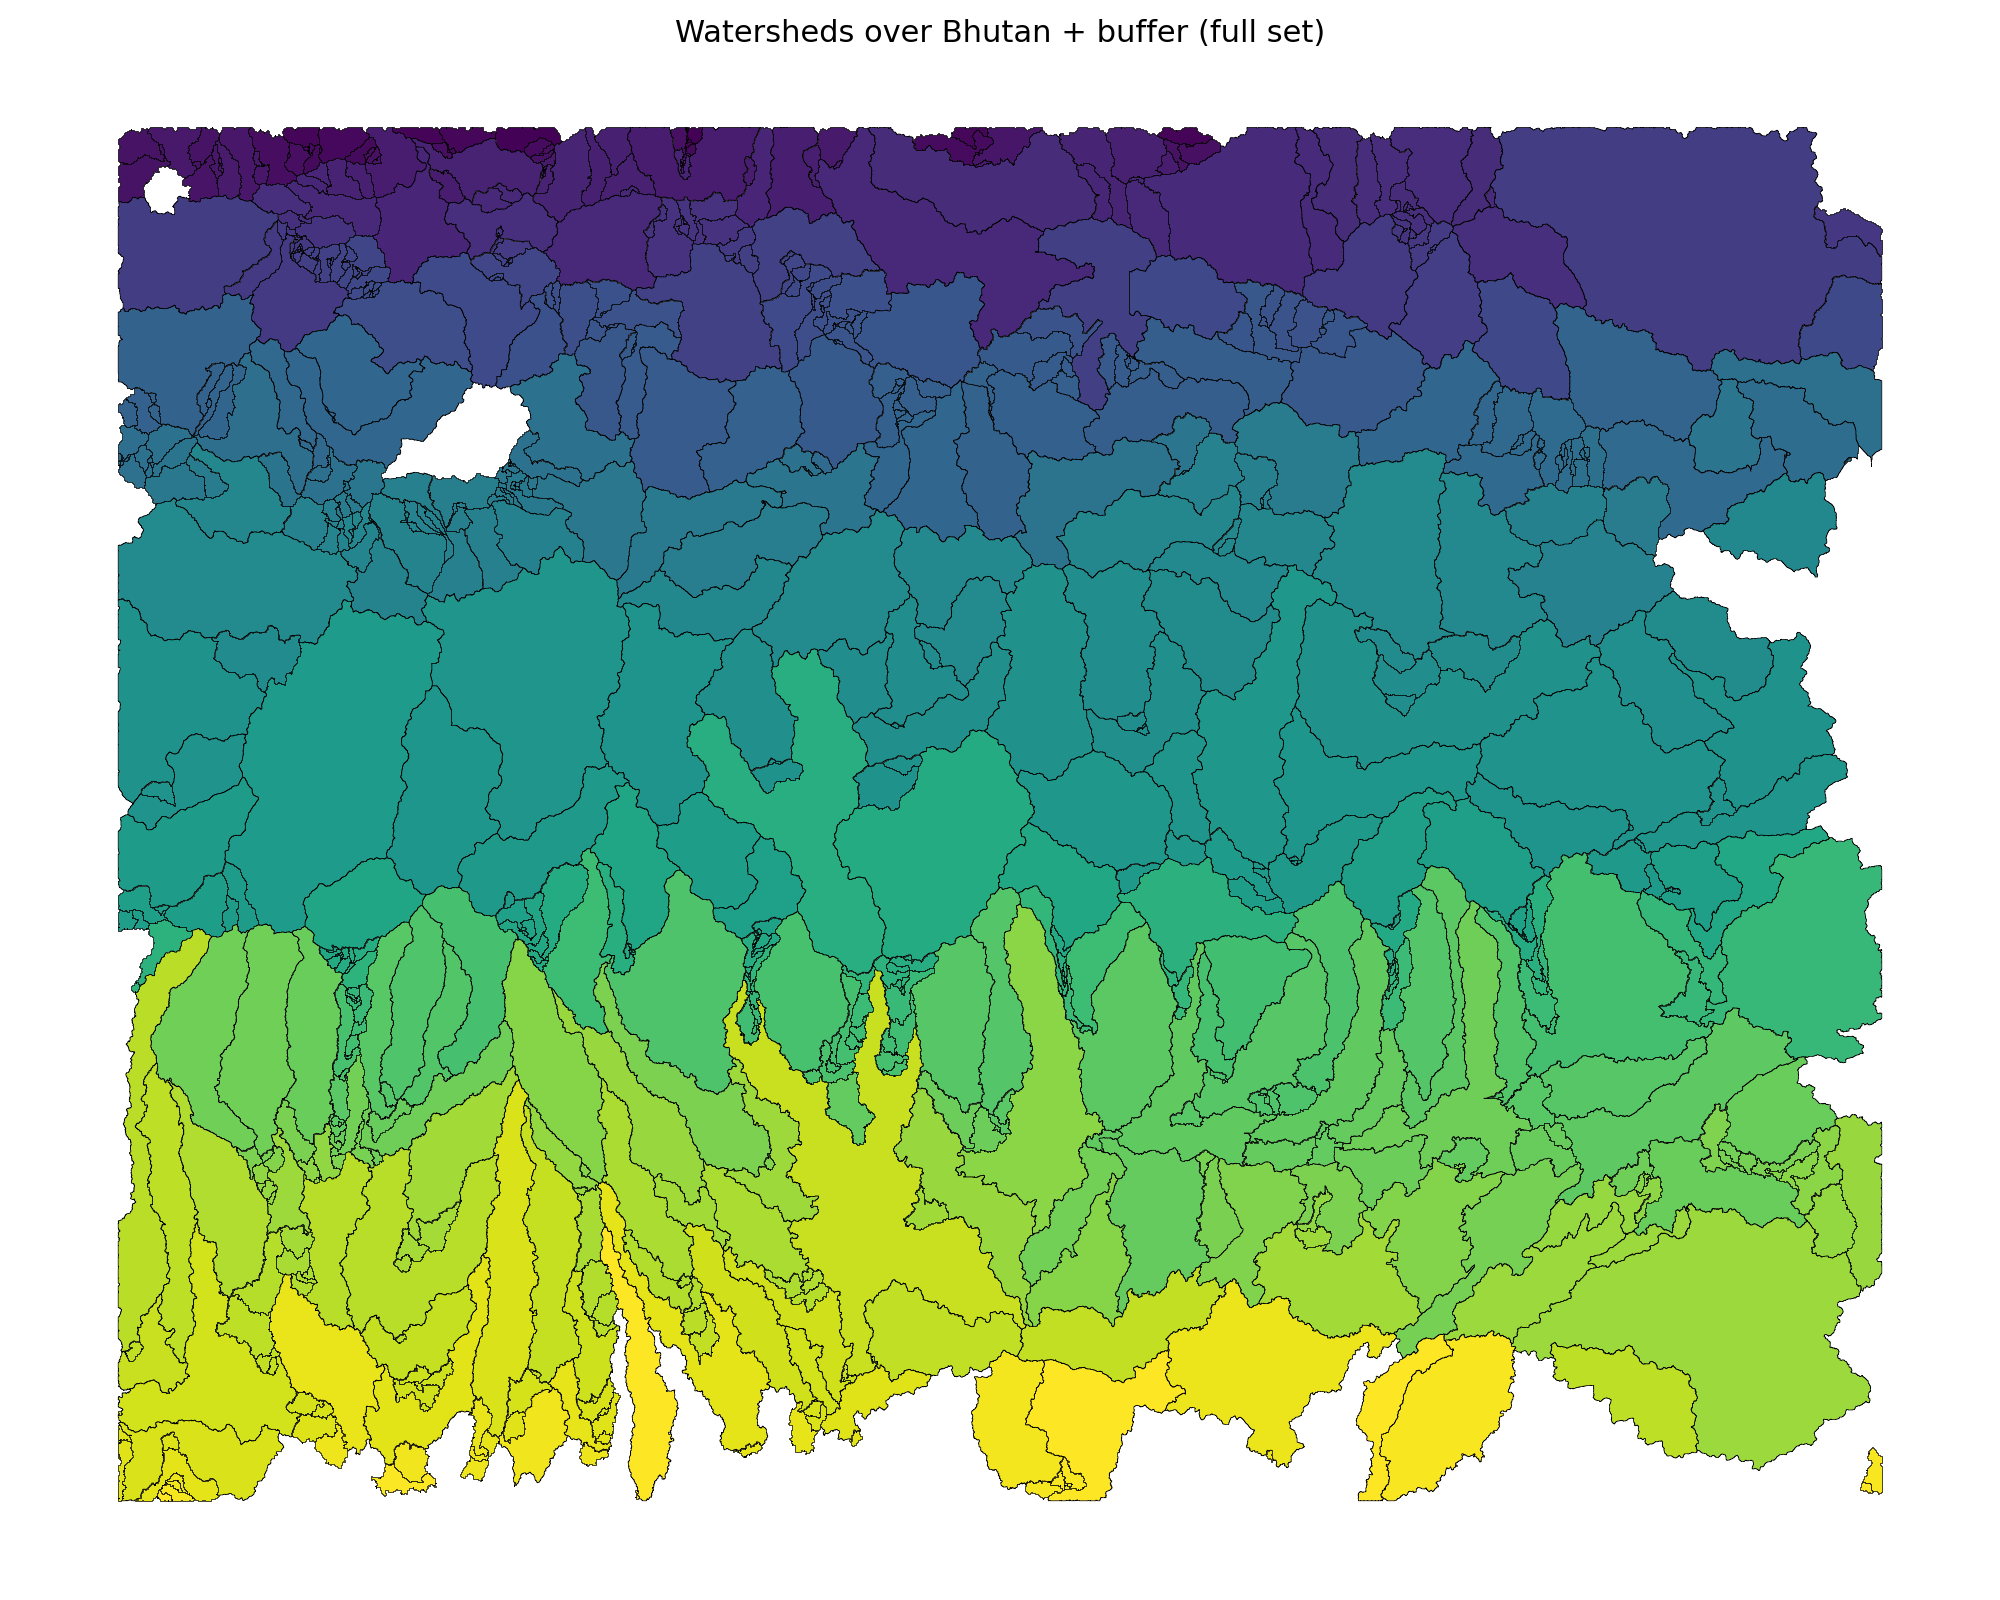

Missing: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/plots/map_watersheds_inside_bhutan.png


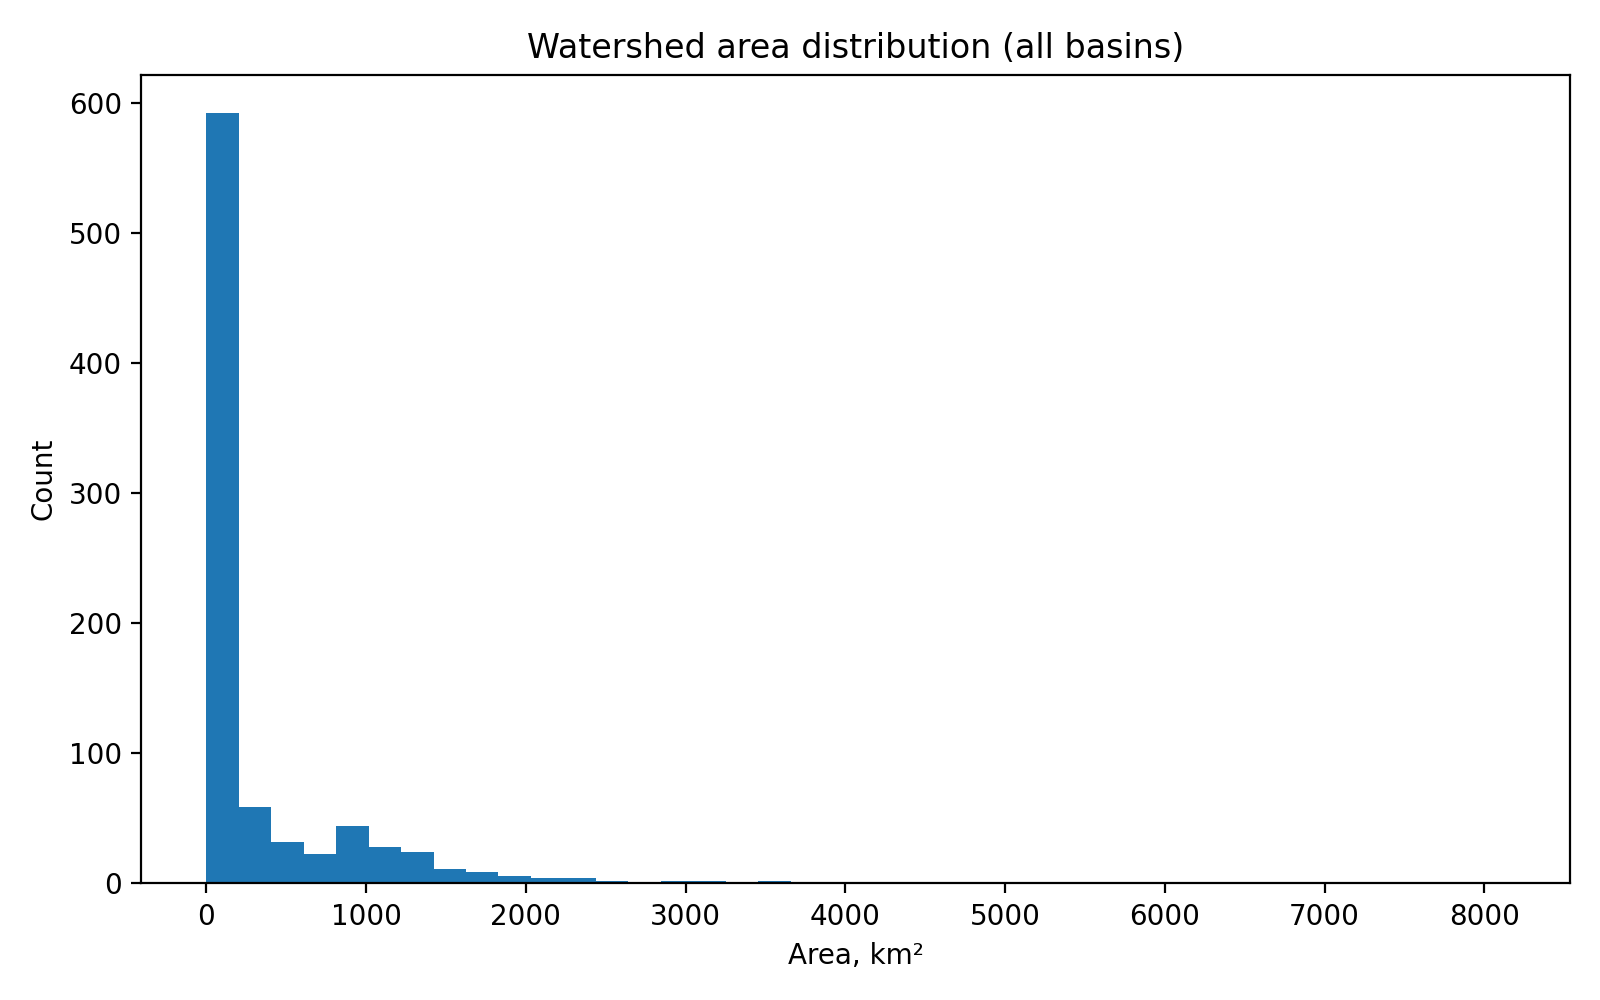

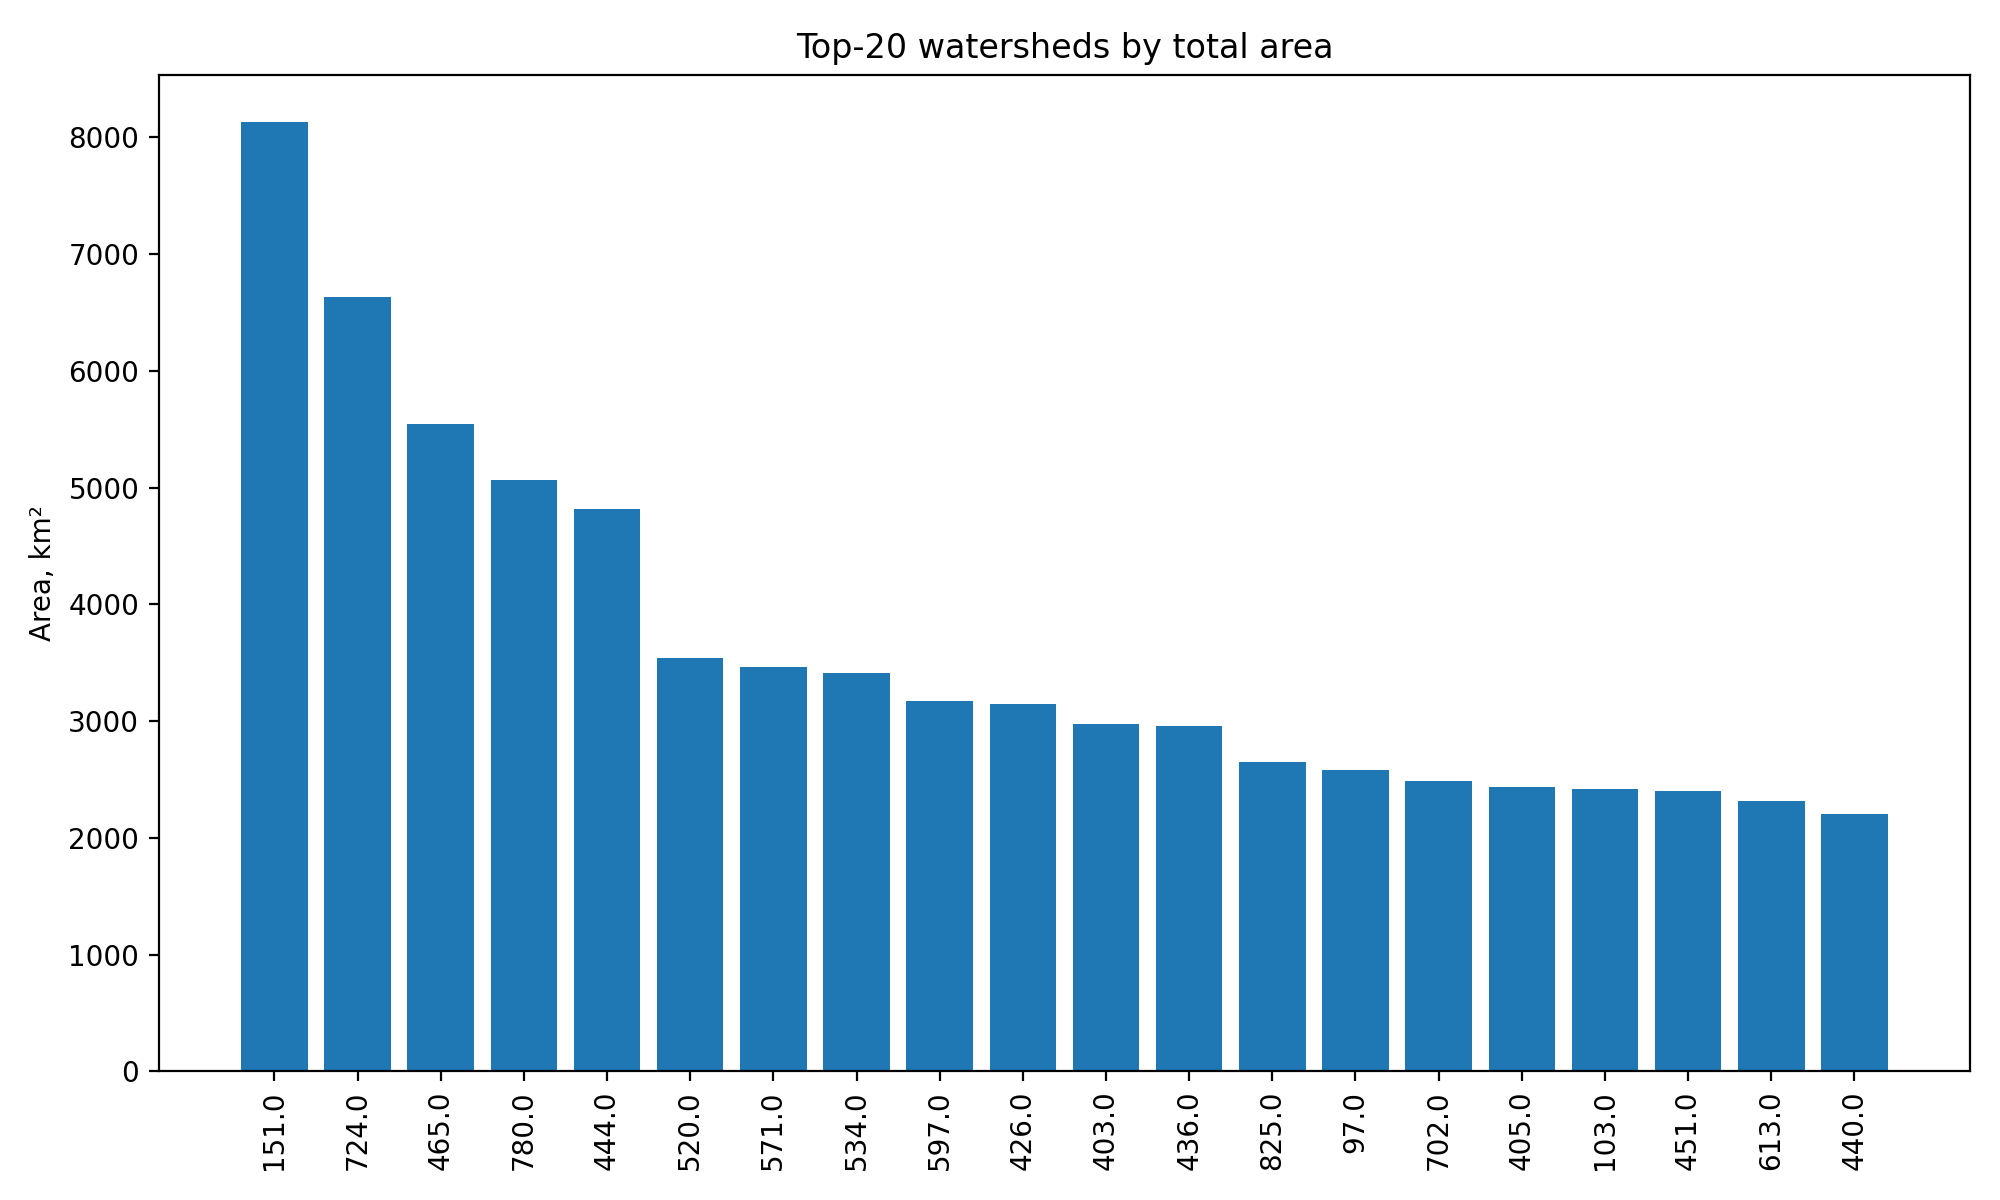

In [28]:
from pathlib import Path
from IPython.display import display, Image

plots_dir = Path("../../data/HydroSHEDS/bt_out/plots").resolve()
for fname in (
    "map_watersheds_full.png",
    "map_watersheds_inside_bhutan.png",  # appears only if Bhutan boundary exists
    "hist_watershed_areas.png",
    "bar_top20_areas.png",
):
    p = plots_dir / fname
    if p.exists():
        display(Image(filename=str(p)))
    else:
        print("Missing:", p)
plt.close()

## 4. Summary 

In [30]:
# Build watersheds_internal_enriched.csv (pyogrio instead of Fiona)

from pathlib import Path
import numpy as np, pandas as pd
import rasterio
from rasterio.transform import xy
import geopandas as gpd           # тільки для .to_crs, НЕ для читання файлів
import pyogrio                    # читаємо GPKG через pyogrio

root    = Path("../../data/HydroSHEDS").resolve()
out_dir = root / "bt_out"
ws_gpkg = out_dir / "watersheds_internal.gpkg"
pp_rast = out_dir / "pp_internal_confluences.tif"
out_csv = out_dir / "watersheds_internal_enriched.csv"

# --- Read watersheds vector via pyogrio (avoids Fiona) ---
gdf = pyogrio.read_dataframe(str(ws_gpkg), layer="watersheds")

# Normalize basin ID to 'ws_id'
if "ws_id" not in gdf.columns:
    if "VALUE" in gdf.columns: gdf = gdf.rename(columns={"VALUE": "ws_id"})
    elif "id" in gdf.columns:  gdf = gdf.rename(columns={"id": "ws_id"})

# --- Area (km²) in equal-area CRS ---
try:
    gdf_aea = gdf.to_crs(8857)  # World Cylindrical Equal Area
except Exception:
    gdf_aea = gdf.to_crs(3857)  # fallback
gdf["area_km2"] = gdf_aea.geometry.area / 1_000_000.0

# --- Centroids in WGS84 ---
cent = gdf.to_crs(4326).geometry.centroid
gdf["centroid_lon"] = cent.x
gdf["centroid_lat"] = cent.y

# --- Pour-point lon/lat from raster IDs ---
with rasterio.open(pp_rast) as src:
    A = src.read(1)
    rr, cc = np.where(A > 0)
    ids = A[rr, cc].astype(int)
    xs, ys = xy(src.transform, rr, cc, offset="center")  # lon/lat if EPSG:4326
pp = pd.DataFrame({"ws_id": ids, "pour_lon": xs, "pour_lat": ys}).drop_duplicates("ws_id")

# --- Merge & export ---
df = gdf.merge(pp, on="ws_id", how="left")
cols = [c for c in [
    "ws_id", "area_km2",
    "centroid_lon", "centroid_lat",
    "pour_lon", "pour_lat",
    "area_inside_km2", "inside_fraction", "class"  # будуть якщо ти їх рахував
] if c in df.columns]
df[cols].sort_values("area_km2", ascending=False).to_csv(out_csv, index=False)
print("CSV written:", out_csv)

/tmp/ipykernel_1318/2365478575.py:32: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = gdf.to_crs(4326).geometry.centroid


CSV written: /home/merlin/Bhutan-Climate-Change/bhutan_climate_modeling/bhutan_climate_modeling/data/HydroSHEDS/bt_out/watersheds_internal_enriched.csv
